---

> $Hitesh$ $Salimath$ $2347118$<br/>
$CIA-1$  $LAB:$ $NNDL$

---

# Question 1: XOR Gate Classification

  - Create the XOR gate's truth table dataset.
  - Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [1]:
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand()

def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron training
def perceptron(X, y, learning_rate, epochs):
    global weights, bias
    for epoch in range(epochs):
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            predicted = step_function(linear_output)
            # Update weights and bias
            error = y[i] - predicted
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
    return weights, bias

# Train perceptron
weights, bias = perceptron(X, y, learning_rate=0.1, epochs=100)
print("Trained weights:", weights)
print("Trained bias:", bias)


Trained weights: [-0.14884382 -0.01525018]
Trained bias: 0.09322215220571589


  - Observe and discuss the perceptron's performance in this scenario.

**Performance Discussion of single layer perceptron:**<br/>
The perceptron gives the following outputs for the XOR truth table:

[0, 0] -> 1 (incorrect) <br/>
[0, 1] -> 1 (correct)<br/>
[1, 0] -> 0 (incorrect)<br/>
[1, 1] -> 0 (correct)<br/>

Therefore, the Single Layer Perceptron struggles to classify the XOR gate correctly because XOR is a non-linearly separable problem. This inability to separate the classes accurately demonstrates the need for more complex models, such as Multi-Layer Perceptrons (MLPs), which introduce non-linearity through hidden layers and non-linear activation functions, enabling them to classify XOR gates correctly.

- Implement XOR using Multi-Layer Perceptron.

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create the MLP model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))  # Hidden layer with 4 neurons and tanh activation
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model
accuracy = model.evaluate(X, y)
print(f'MLP Accuracy: {accuracy[1]}')

# Predict XOR gate outputs
predictions = model.predict(X)
print(f'Predictions for XOR gate: {np.round(predictions)}')


1/1 [==============================] - 0s 107ms/step - loss: 0.3137 - accuracy: 1.0000
MLP Accuracy: 1.0
1/1 [==============================] - 0s 47ms/step
Predictions for XOR gate: [[0.]
 [1.]
 [1.]
 [0.]]


#Question 2:

## A. Sentiment Analysis Twitter Airline

In [6]:
import pandas as pd

data = pd.read_csv('/content/Tweets - Tweets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- Create a simple feed-forward neural network for binary sentiment classification(positive/negative).
- Use backpropagation to optimize the model's weights based on error calculation.
- Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
- Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Filter only positive and negative sentiments
data = data[data['airline_sentiment'].isin(['positive', 'negative'])]

# Preprocessing text and labels
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()

# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['airline_sentiment'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


73/73 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.9155
Activation Function: sigmoid, Accuracy: 0.9155


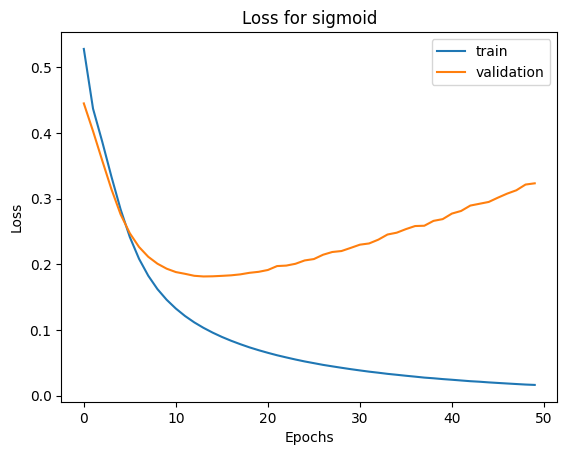

73/73 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.9086
Activation Function: relu, Accuracy: 0.9086


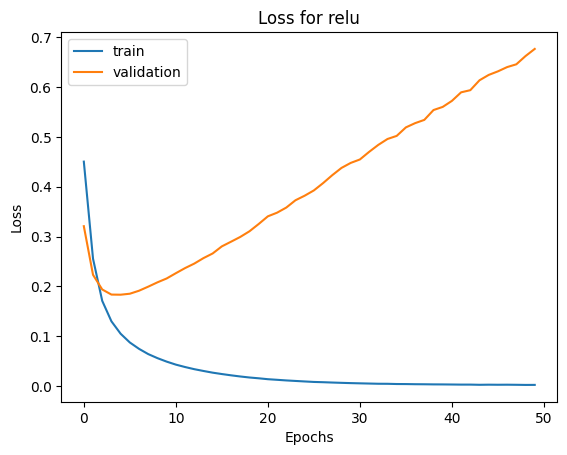

73/73 [==============================] - 0s 2ms/step - loss: 0.8424 - accuracy: 0.9065
Activation Function: tanh, Accuracy: 0.9065


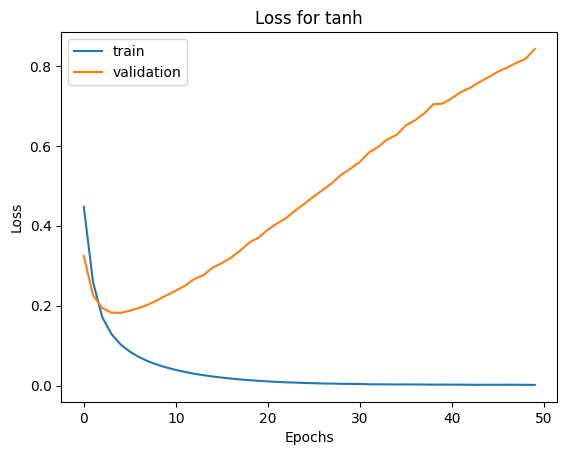

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the model
def create_model(activation):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Compile and train the model
def train_model(activation, epochs=50):
    model = create_model(activation)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Activation Function: {activation}, Accuracy: {accuracy:.4f}")

    # Plot loss over epochs
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'Loss for {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Train and evaluate with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
for activation in activations:
    train_model(activation)

**Results:**

- Sigmoid Activation:

  - Loss: 0.3235
  - Accuracy: 91.55%
- ReLU Activation:
  - Loss: 0.6769
  - Accuracy: 90.86%
- Tanh Activation:

  - Loss: 0.8424
  - Accuracy: 90.65%

**Observations and Analysis:**
- ***Accuracy Comparison:***

  - Sigmoid achieved the highest accuracy at 91.55%, followed by ReLU with 90.86%, and Tanh with 90.65%. The small difference in accuracy between the activation functions suggests that for this task, each performs relatively well, with Sigmoid performing slightly better.
- ***Loss Comparison:***

  - Sigmoid had the lowest loss, which aligns with its highest accuracy. This indicates that the model trained with the Sigmoid activation was able to reduce the prediction error more effectively.
  - ReLU and Tanh had higher losses compared to Sigmoid, which could explain their slightly lower accuracy. Tanh had the highest loss, indicating that it struggled more in optimizing the weights.
- ***Model Suitability:***

  - Sigmoid seems to be the best fit for this dataset and task, as it yielded the highest accuracy and lowest loss.
  - ReLU can still be effective, especially in more complex or larger networks. Its performance here was solid but slightly behind Sigmoid.
  - Tanh might not be ideal for this particular task, but it could be explored further in more complex models with multiple layers.